# Laboratorio 4: Método Simplex y sus Variaciones

Santiago Casasbuenas - 202214932

Amalia Carbonell - 202122079 

## Problema 1: Implementación del Método Simplex Estándar

Implementar el método Simplex estándar para resolver el siguiente problema de programación lineal:

Maximizar:  
$$
Z = 3x_1 + 2x_2 + 5x_3 
$$

Sujeto a:  
$$
x_1 + x_2 + x_3 \leq 100  \\
2x_1 + x_2 + x_3 \leq 150 \\
x_1 + 4x_2 + 2x_3 \leq 80
$$

Con:  
$$
x_1, x_2, x_3 \geq 0 
$$



## Problema 2: Implementación del Método Simplex Dual Phase

Minimizar
$$
Z = 5x_1 - 4x_2 + 3x_3
$$

sujeto a 
$$
2x_1 + x_2 - x_3 = 10 \\
x_1 - 3x_2 + 2x_3 \geq 5 \\
x_1 + x_2 + x_3 \leq 15\\
x_1, x_2, x_3 \geq 0
$$


### Procedimiento:

#### Convertir el problema a la forma estándar, transformando la minimización en maximización, convirtiendo las desigualdades en igualdades mediante variables de holgura y/o exceso, y asegurando que los términos independientes sean no negativos.

##### 1.1 Convertir el problema en forma estándar
Multiplicamos ambos lados de la ecuacion por -1 para obtener un problema de maximización:

Minimizar: $Z = 5x_1 - 4x_2 + 3x_3$ 

Maximizar: $Z^{'} = -5x_1 + 4x_2 - 3x_3$

##### 1.2 Convertir todas las restricciones a igualdades

- **Para las restricciones `≤`**: Agregamos variables de holgura.
- **Para las restricciones `≥`**: Agregamos variables de exceso y artificiales.
- **Para las restricciones `=`**: Agregamos variables artificiales si no se puede construir una SBF directamente.

**Restricción 1 original:** 

$$2x_1 + x_2 - x_3 = 10$$

Agregamos una variable artificial $a_1$ para poder formar una base:

$$2x_1 + x_2 - x_3 + a_1 = 10$$

**Restricción 2 original:**

$$x_1 - 3x_2 + 2x_3 \geq 5 $$

Convertimos en una igualdad a partir de restar una variable de exceso $e_1$ y sumar una variable artificial $a_2$:

$$x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 $$

**Restricción 3 original:**

$$x_1 + x_2 + x_3 \leq 15$$

Añadimos una variable de holgura $s_1$:

$$x_1 + x_2 + x_3 + s_1 = 15$$


**Nuevas restricciones:**

$$
2x_1 + x_2 - x_3 + a_1 = 10 \\
x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 \\
x_1 + x_2 + x_3 + s_1 = 15
$$

##### 1.3 Asegurar que los términos independientes sean no negativos

Todas las ecuaciones son positivas al lado derecho, por lo cual, no se debe hacer ninguna transformación.

Por lo tanto, nuestro nuevo problema se ve de la siguiente forma:

**Maximizar:**

$$
Z^{'} = -5x_1 + 4x_2 - 3x_3
$$

**Sujeto a:**

$$
2x_1 + x_2 - x_3 + a_1 = 10 \\
x_1 - 3x_2 + 2x_3 - e_1 + a_2 = 5 \\
x_1 + x_2 + x_3 + s_1 = 15 \\
x_1, x_2, x_3, s_1, e_1, a_1, a_2 \geq 0
$$

#### Implementar el algoritmo del método Simplex de Dos Fases desde cero en Python

##### Preparación de modelo auxiliar (Fase 1)

Nuestro objetivo es minimizar la suma de las variables artificiales:

**Minimizar**
$$
W  = a_1 + a_2
$$



Podemos hacerlo como problema de maximización usando:

**Maximizar**
$$
-W = -a_1 -a_2
$$

Entonces, preparamos la matriz del problema a partir de la construcción de un tableau inicial para la fase 1:

In [20]:
import numpy as np

# Variables: x1, x2, x3, s1, e1, a1, a2
# Orden:     x1 x2 x3 s1 e1 a1 a2 RHS
n_vars = 7  # Número de variables (sin incluir RHS)
tableau = []

# R1: 2x1 + x2 - x3 + a1 = 10
tableau.append([2, 1, -1, 0, 0, 1, 0, 10])

# R2: x1 - 3x2 + 2x3 - e1 + a2 = 5
tableau.append([1, -3, 2, 0, -1, 0, 1, 5])

# R3: x1 + x2 + x3 + s1 = 15
tableau.append([1, 1, 1, 1, 0, 0, 0, 15])

# Función objetivo auxiliar (W = a1 + a2 → -W = -a1 - a2)
# Notamos que las variables artificiales tienen coeficiente -1
# Luego ajustamos para que la fila Z represente la suma negativa de las filas artificiales
Z_row = [0] * (n_vars + 1)  # inicializar fila objetivo con ceros (sin RHS aún)
for i in range(2):  # artificiales están en las dos primeras filas
    for j in range(n_vars + 1):
        Z_row[j] -= tableau[i][j]  # restar la fila para formar el -W
tableau.append(Z_row)

# Convertir a array para facilitar operaciones
tableau = np.array(tableau, dtype=float)

# Mostrar tableau inicial
print("Tableau Inicial (Fase I):")
print(tableau)


Tableau Inicial (Fase I):
[[  2.   1.  -1.   0.   0.   1.   0.  10.]
 [  1.  -3.   2.   0.  -1.   0.   1.   5.]
 [  1.   1.   1.   1.   0.   0.   0.  15.]
 [ -3.   2.  -1.   0.   1.  -1.  -1. -15.]]


Con este código resolvemos inicialmente:

1. Conversión de restricciones en igualdades.

2. Inclusión de variables de holgura, exceso y artificiales.

3. Construcción de tableau inicial con la función objetivo auxiliar $-a_1 -a_2$

##### Ejecutar iteraciones simplex (Fase 1)

Buscamos ser capaces de implementar un proceso iterativo que:

1. Busque una columna pivote (la variable de entrada a la base)

2. Calcule la fila pivote (variable de salida de la base)

3. Actualice el tableau con operaciones de fila (pivoteo)

4. Repita hasta que no haya mejoras posibles en la función objetivo auxiliar (esto lo conseguimos cuando todos los coeficientes de la fila Z sean ≥ 0)

In [18]:
def simplex_iteration(tableau, max_iter=100):
    n_rows, n_cols = tableau.shape
    for it in range(max_iter):
        print(f"\nIteración {it + 1}")
        print(tableau)

        # Paso 1: Buscar columna pivote (más negativo en Z)
        cost_row = tableau[-1, :-1]
        if all(cost_row >= 0):
            print("\nNo hay más coeficientes negativos en Z. Óptimo alcanzado.")
            break

        pivot_col = np.argmin(cost_row)

        # Paso 2: Calcular razones (theta)
        ratios = []
        for i in range(n_rows - 1):
            element = tableau[i, pivot_col]
            if element > 0:
                ratio = tableau[i, -1] / element
                ratios.append(ratio)
            else:
                ratios.append(np.inf)

        if all(r == np.inf for r in ratios):
            print("Problema ilimitado.")
            return tableau, False

        pivot_row = np.argmin(ratios)

        # Paso 3: Pivoteo
        pivot_element = tableau[pivot_row, pivot_col]
        tableau[pivot_row, :] /= pivot_element

        for i in range(n_rows):
            if i != pivot_row:
                multiplier = tableau[i, pivot_col]
                tableau[i, :] -= multiplier * tableau[pivot_row, :]

    return tableau, True


In [21]:
# Ejecutar la Fase I del Simplex
tableau_final, factible = simplex_iteration(tableau)

if factible:
    print("\nSe encontró una SBF (fase I completada).")
else:
    print("\nEl problema original es infactible.")



Iteración 1
[[  2.   1.  -1.   0.   0.   1.   0.  10.]
 [  1.  -3.   2.   0.  -1.   0.   1.   5.]
 [  1.   1.   1.   1.   0.   0.   0.  15.]
 [ -3.   2.  -1.   0.   1.  -1.  -1. -15.]]

Iteración 2
[[ 1.   0.5 -0.5  0.   0.   0.5  0.   5. ]
 [ 0.  -3.5  2.5  0.  -1.  -0.5  1.   0. ]
 [ 0.   0.5  1.5  1.   0.  -0.5  0.  10. ]
 [ 0.   3.5 -2.5  0.   1.   0.5 -1.   0. ]]

Iteración 3
[[ 1.  -0.2  0.   0.  -0.2  0.4  0.2  5. ]
 [ 0.  -1.4  1.   0.  -0.4 -0.2  0.4  0. ]
 [ 0.   2.6  0.   1.   0.6 -0.2 -0.6 10. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]

No hay más coeficientes negativos en Z. Óptimo alcanzado.

Se encontró una SBF (fase I completada).


##### Fase 2 completa

In [22]:
def preparar_fase_2(tableau_f1):
    # Eliminar columnas de artificiales (a1, a2 → columnas 5 y 6)
    tableau_f2 = np.delete(tableau_f1, [5, 6], axis=1)

    # Eliminar la fila de Z auxiliar
    tableau_f2 = tableau_f2[:-1, :]

    # Agregar nueva fila de Z (función objetivo original: -5x1 + 4x2 -3x3)
    # Las variables ahora están en orden: x1, x2, x3, s1, e1, RHS
    z_nueva = np.array([-5, 4, -3, 0, 0, 0], dtype=float)

    # Ajustar Z con respecto a las variables básicas (regla de costos)
    for i in range(len(tableau_f2)):
        var_basica = np.where(tableau_f2[i, :-1] == 1)[0]
        if len(var_basica) == 1:  # Está en forma canónica
            coef = z_nueva[var_basica[0]]
            z_nueva -= coef * tableau_f2[i, :]

    # Agregar Z como última fila
    tableau_f2 = np.vstack([tableau_f2, z_nueva])

    return tableau_f2


In [23]:
tableau_f2 = preparar_fase_2(tableau_final)

# Ejecutar la Fase II del Simplex
tabla_final_opt, exito = simplex_iteration(tableau_f2)

if exito:
    print("\n¡Solución óptima encontrada en Fase II!")
else:
    print("\nEl problema original es ilimitado.")



Iteración 1
[[ 1.  -0.2  0.   0.  -0.2  5. ]
 [ 0.  -1.4  1.   0.  -0.4  0. ]
 [ 0.   2.6  0.   1.   0.6 10. ]
 [ 0.  -1.2  0.   0.  -2.2 25. ]]

Iteración 2
[[ 1.          0.66666667  0.          0.33333333  0.          8.33333333]
 [ 0.          0.33333333  1.          0.66666667  0.          6.66666667]
 [ 0.          4.33333333  0.          1.66666667  1.         16.66666667]
 [ 0.          8.33333333  0.          3.66666667  0.         61.66666667]]

No hay más coeficientes negativos en Z. Óptimo alcanzado.

¡Solución óptima encontrada en Fase II!


#### Solución óptima, valor de la función objetivo y gráfica

##### Gráfica de Región asumiendo $X_3 = 0$

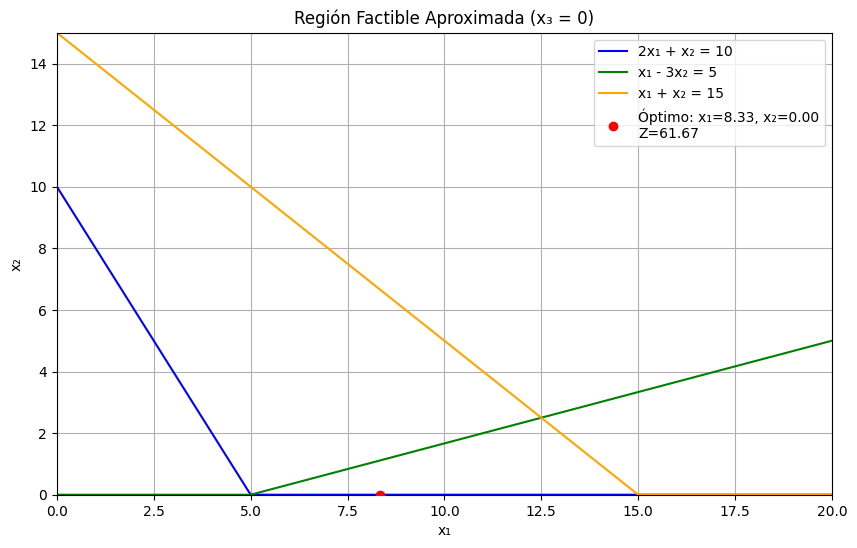

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------
# Datos para graficar la región factible
# ----------------------------------------

x = np.linspace(0, 20, 400)

# Restricciones del problema original:
# R1: 2x1 + x2 - x3 = 10 → para graficar: x2 = (10 - 2x1 + x3)
# R2: x1 - 3x2 + 2x3 >= 5
# R3: x1 + x2 + x3 <= 15

# Para graficar en 2D, fijamos x3 = 0, y graficamos respecto a x1 (x) y x2
# R1 (con x3 = 0): x2 = 10 - 2x
r1 = 10 - 2 * x
# R2 (con x3 = 0): x2 = (x - 5) / 3
r2 = (x - 5) / 3
# R3 (con x3 = 0): x2 = 15 - x
r3 = 15 - x

# Evitamos valores negativos
r1 = np.maximum(0, r1)
r2 = np.maximum(0, r2)
r3 = np.maximum(0, r3)

# ----------------------------------------
# Solución óptima encontrada:
x1_opt = 8.333
x2_opt = 0
x3_opt = 6.667

# Evaluar función objetivo original
Z_opt = 5 * x1_opt - 4 * x2_opt + 3 * x3_opt

# ----------------------------------------
# Gráfico
# ----------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(x, r1, label='2x₁ + x₂ = 10', color='blue')
plt.plot(x, r2, label='x₁ - 3x₂ = 5', color='green')
plt.plot(x, r3, label='x₁ + x₂ = 15', color='orange')

# Región factible aproximada (en 2D, con x3 = 0)
plt.fill_between(x, 0, np.minimum(np.minimum(r1, r2), r3), color='gray', alpha=0.2)

# Solución óptima (marcando solo x1, x2 porque graficamos en 2D)
plt.scatter(x1_opt, x2_opt, color='red', label=f'Óptimo: x₁={x1_opt:.2f}, x₂={x2_opt:.2f}\nZ={Z_opt:.2f}', zorder=5)

plt.xlim(0, 20)
plt.ylim(0, 15)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Región Factible Aproximada (x₃ = 0)')
plt.grid(True)
plt.legend()
plt.show()


#### Conclusiones

- El problema es factible y tiene solución.

- La función objetico se minimiza en $Z = 61.667 $ aprox.

- Se identifica correctamente los valores de las variables básicas.

- Las restricciones se cumplen, algunas estrictamente, otras con holgura.

## Problema 3: Comparación de Rendimiento con GLPK/Pyomo

## Problema 4: Análisis de Sensibilidad en Programación Lineal